Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score, confusion_matrix
!pip install kneed

Loading DataSet

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()



Doing EDA

In [ ]:
#reading the data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#standar scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [ ]:
#unique value
df['species'].unique()

array([0, 1, 2])

In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [ ]:
# EDA (Exploratory Data Analysis)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


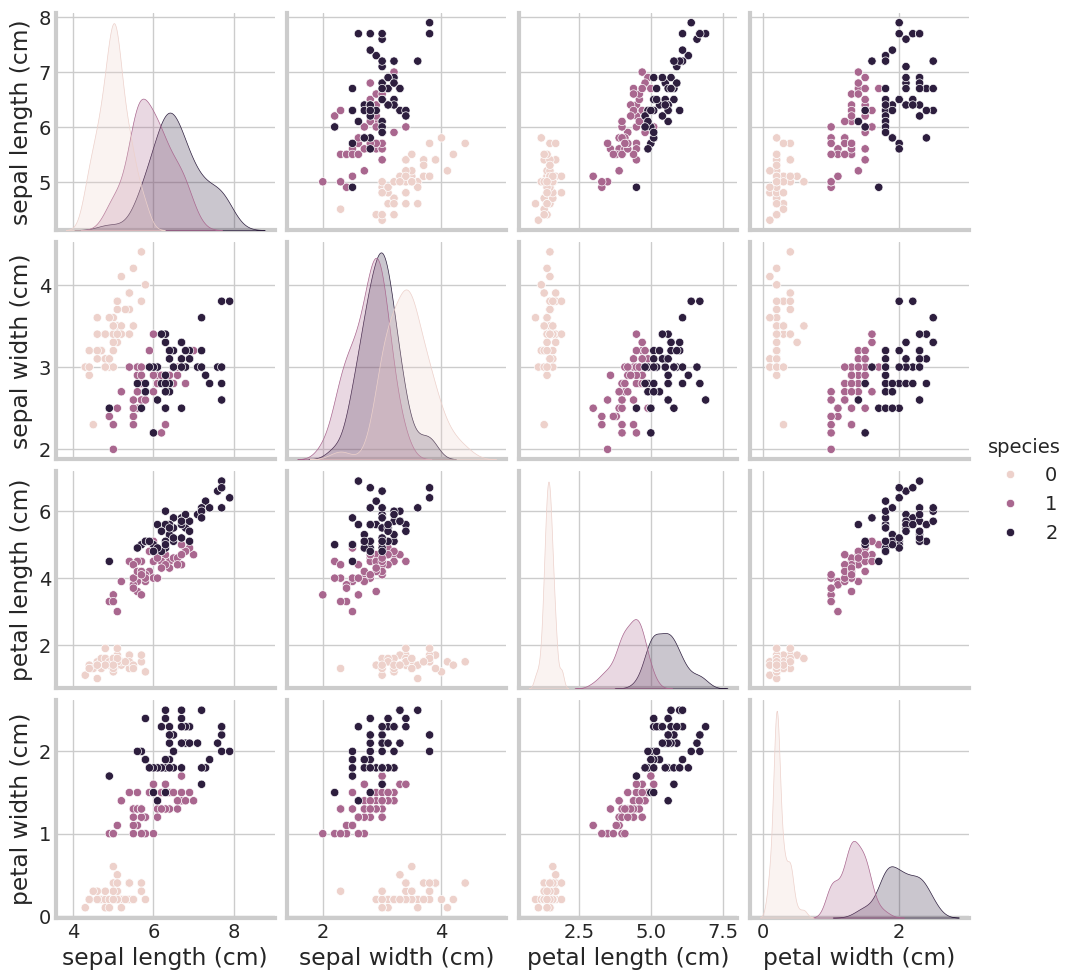

In [ ]:
#pairplot
sns.set_style("whitegrid")
sns.pairplot(df, hue='species')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

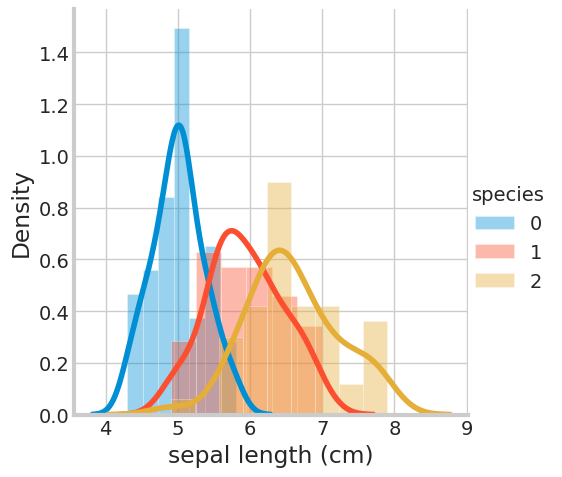

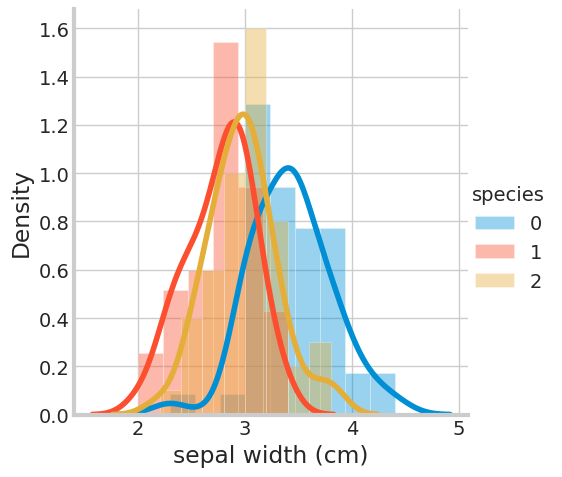

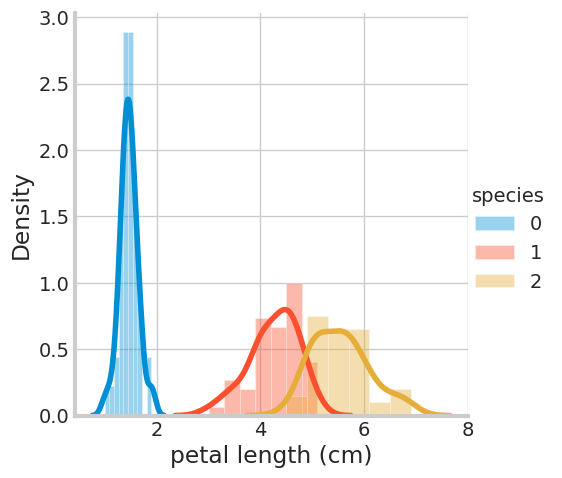

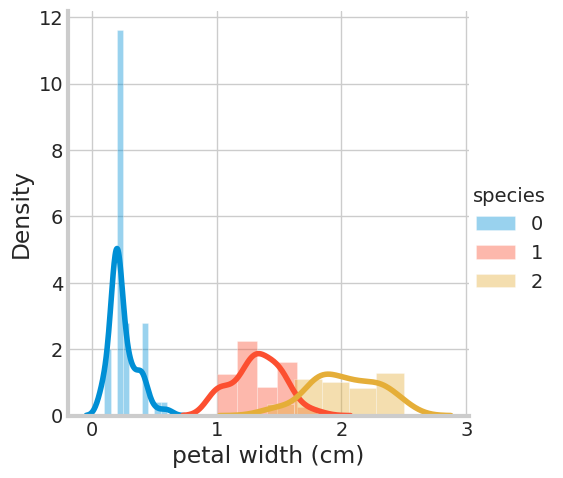

In [ ]:
#Distribution plots
df['species'] = iris.target
sns.FacetGrid(df, hue='species', height=5).map(sns.distplot, 'sepal length (cm)').add_legend()
sns.FacetGrid(df, hue='species', height=5).map(sns.distplot, 'sepal width (cm)').add_legend()
sns.FacetGrid(df, hue='species', height=5).map(sns.distplot, 'petal length (cm)').add_legend()
sns.FacetGrid(df, hue='species', height=5).map(sns.distplot, 'petal width (cm)').add_legend()
plt.show()

<Axes: >

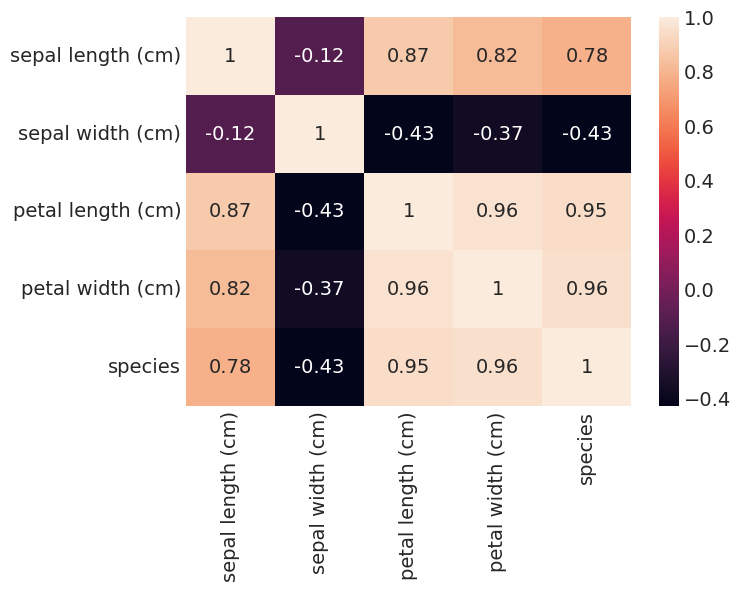

In [ ]:
#correlation heatmap
sns.heatmap(df.corr(), annot=True)

Getting The Elbow

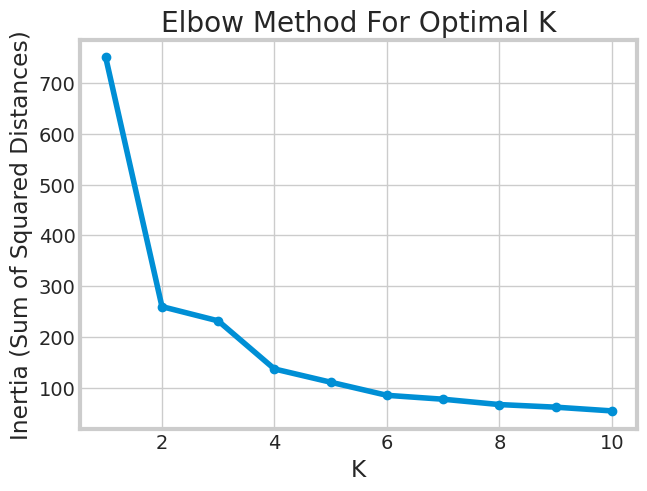

In [ ]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal K')
plt.show()


Measuring which point should count as elbow bending

In [ ]:
from kneed import KneeLocator
k1=KneeLocator(range(1, 11), inertia , curve='convex', direction= 'decreasing')
k1.elbow

np.int64(4)

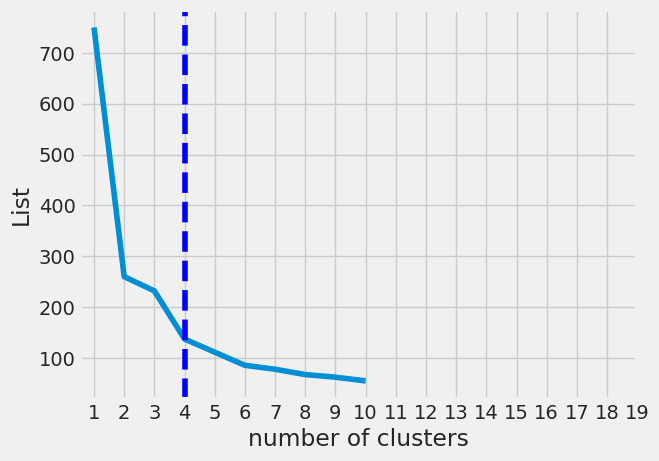

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), inertia)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('List')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

K-Means Cluster

In [ ]:
#doing k means cluster
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
preds = kmeans.predict(X_scaled)
preds

array([2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
centroids= kmeans.cluster_centers_
print(centroids)

[[ 0.08963316 -0.69861767  0.29603555  0.18060611  0.04710557]
 [-1.35230687  0.11914427 -1.31439133 -1.29749445 -1.22474487]
 [-0.74922133  1.43007001 -1.29759846 -1.22142131 -1.22474487]
 [ 0.95975051 -0.13197948  1.03865661  1.1115241   1.22474487]]


PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratios:", pca.explained_variance_ratio_)

Explained variance ratios: [0.76740358 0.18282727]


In [ ]:
kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

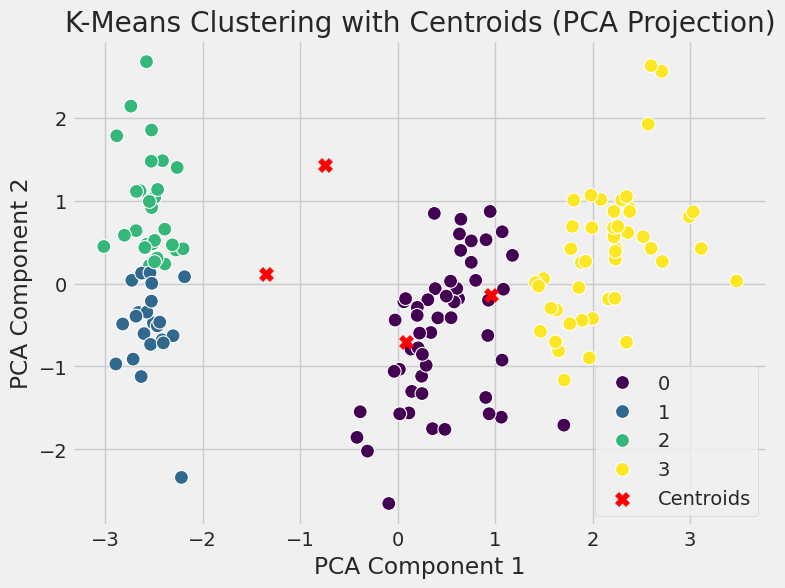

In [ ]:
#Visualising the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', s=100)
plt.scatter(centroids[:,0], centroids[:,1],c='red', s=100, marker='X', label='Centroids')
plt.title("K-Means Clustering with Centroids (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

 Hierarchical Clustering-(Dendrogram)

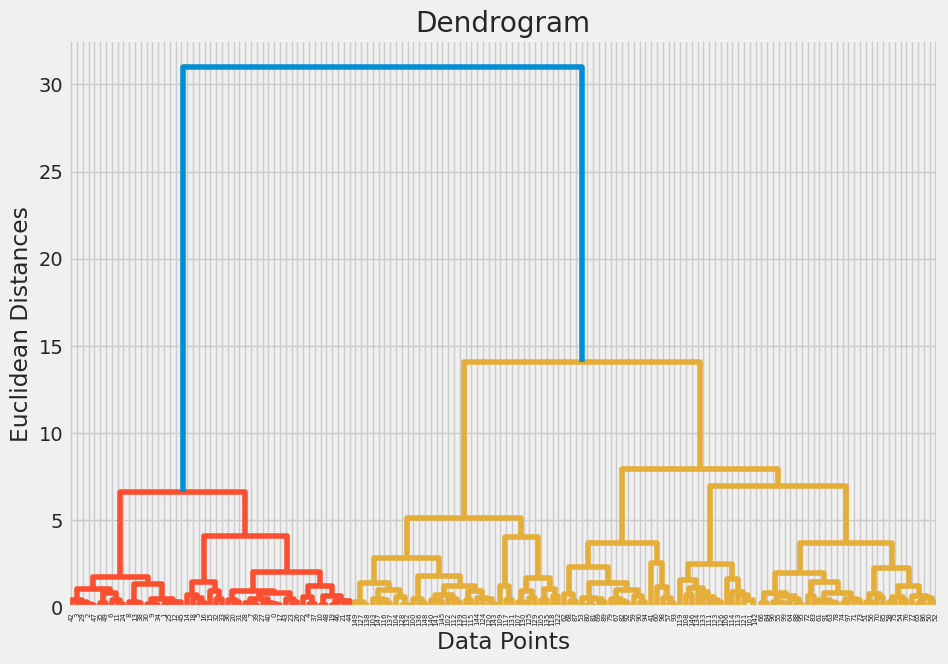

In [ ]:
#dendrogram
plt.figure(figsize=(10, 7))
dendrogram = dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()


In [ ]:
#apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['cluster'] = agg_clustering.fit_predict(X_scaled)

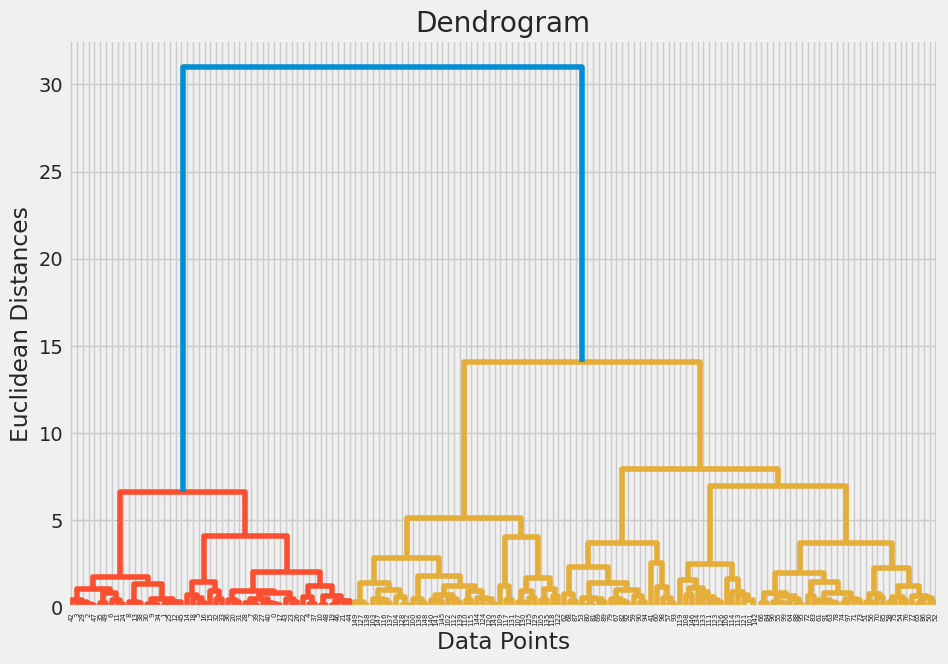

In [ ]:
#choose number of cluster from dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

<Axes: >

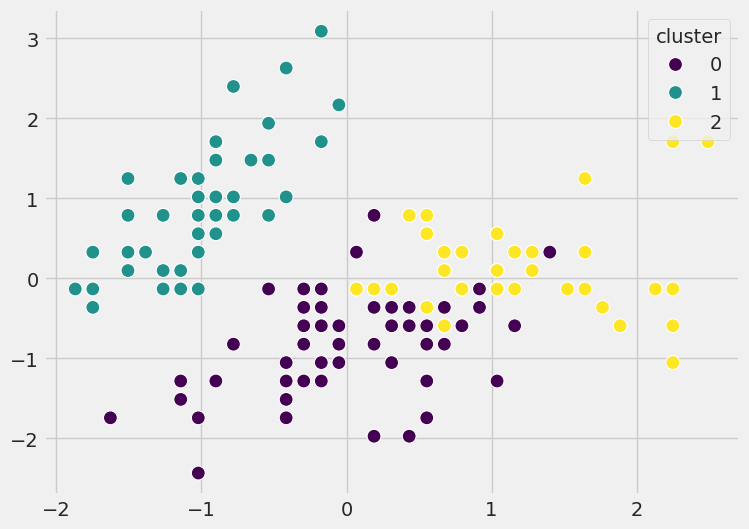

In [ ]:
#Visualize results from dendrogram
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette='viridis', s=100)


Applying DBSCAN

In [ ]:
#apply dbscan
dbscan = DBSCAN(eps=0.7, min_samples=3)
df['cluster'] = dbscan.fit_predict(X_scaled)

<Axes: >

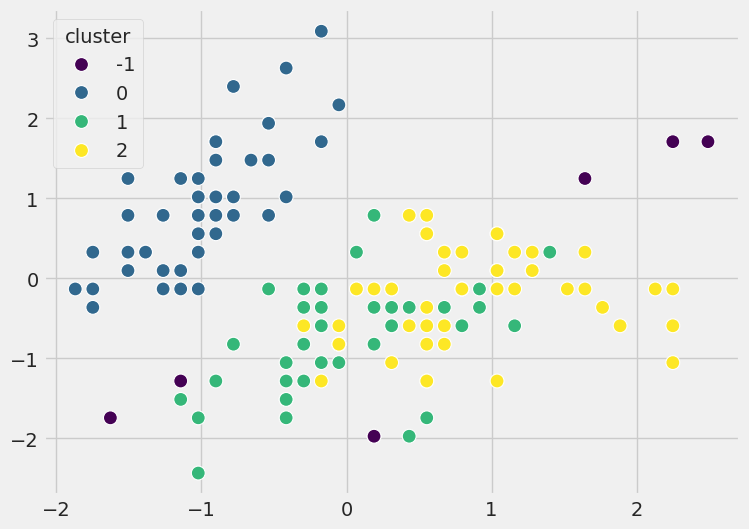

In [ ]:
# Visualize DBSCAN result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette='viridis', s=100)

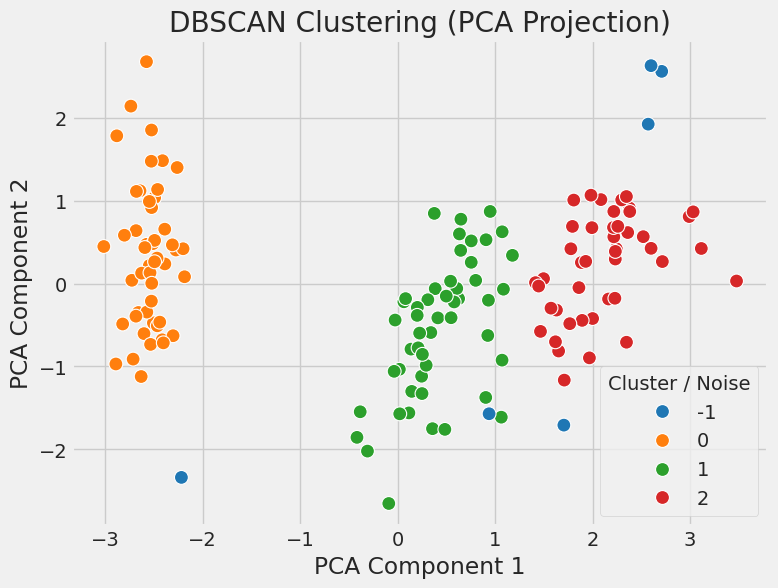

In [ ]:

db = DBSCAN(eps=0.7, min_samples=3)
y_db = db.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_db, palette='tab10', s=100)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster / Noise")
plt.grid(True)
plt.show()


Measuring and Evaluating ARI of Each Models or Algorithm

✅ Adjusted Rand Index (ARI): 0.8281

📊 Confusion Matrix:


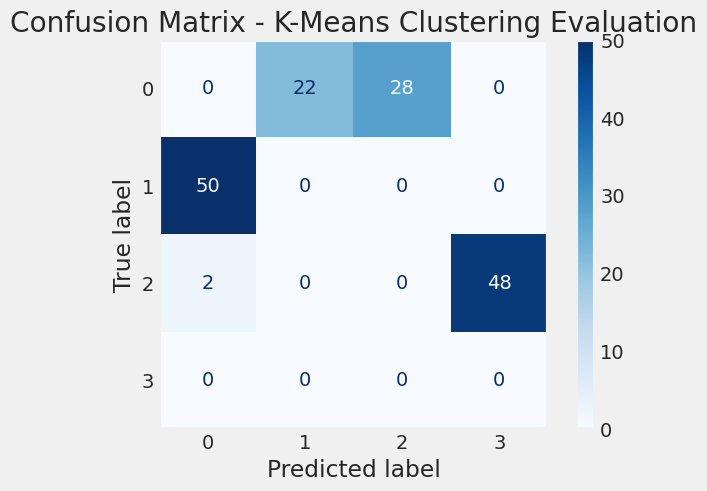

In [ ]:
# Evaluate K-Means Clustering
from sklearn.metrics import confusion_matrix, adjusted_rand_score, ConfusionMatrixDisplay

def evaluate_clustering(true_labels, predicted_labels, title="Cluster Evaluation"):
    ari = adjusted_rand_score(true_labels, predicted_labels)
    print(f"✅ Adjusted Rand Index (ARI): {ari:.4f}")
    print("\n📊 Confusion Matrix:")
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.grid(False)
    plt.show()

evaluate_clustering(df['species'], kmeans.labels_, title="K-Means Clustering Evaluation")

✅ Adjusted Rand Index (ARI): 0.7369

📊 Confusion Matrix:


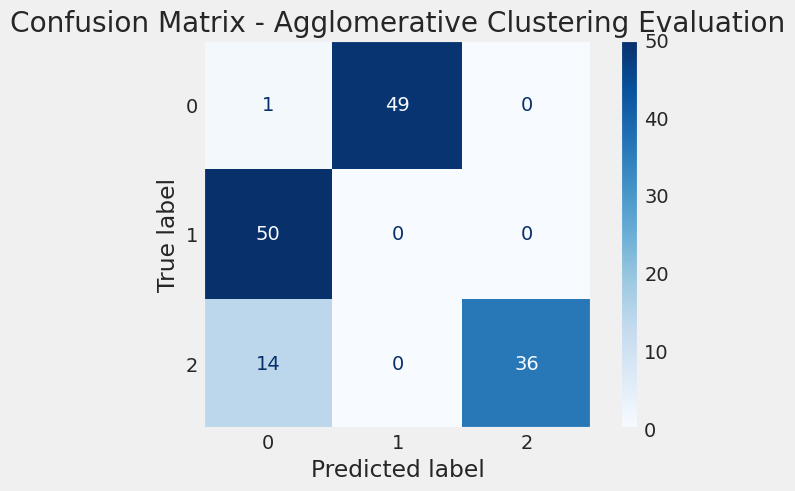

In [ ]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Evaluate Agglomerative Clustering
evaluate_clustering(df['species'], agg_clusters, title="Agglomerative Clustering Evaluation")

**Reasoning**:
Apply DBSCAN and evaluate its performance.



✅ Adjusted Rand Index (ARI): 0.9424

📊 Confusion Matrix:


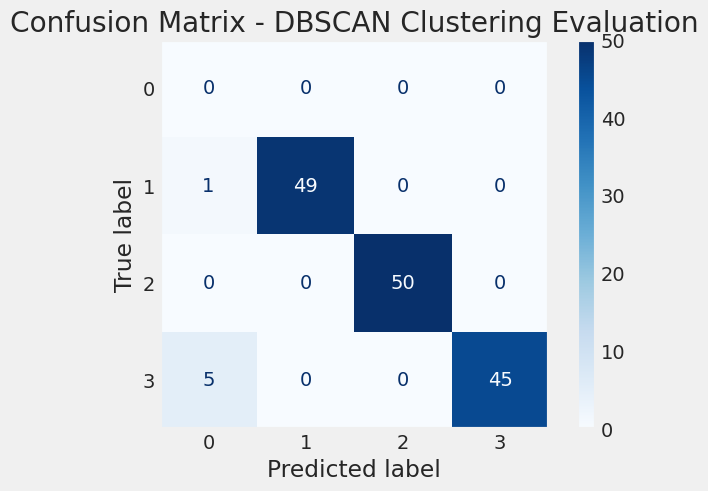

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=3)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Evaluate DBSCAN
evaluate_clustering(df['species'], dbscan_clusters, title="DBSCAN Clustering Evaluation")

## Visualizing the clustering results




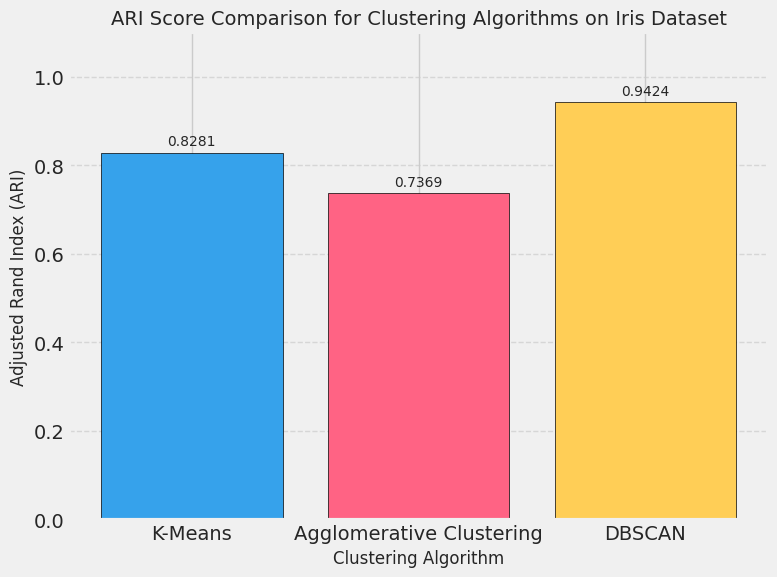

In [ ]:
# Calculate ARI scores (code from cell qY8ObG69kNci included here)
ari_kmeans = adjusted_rand_score(df['species'], kmeans.labels_)
ari_agglo = adjusted_rand_score(df['species'], agg_clustering.labels_)
ari_dbscan = adjusted_rand_score(df['species'], dbscan.labels_)

algorithms = ['K-Means', 'Agglomerative Clustering', 'DBSCAN']
ari_scores = [ari_kmeans, ari_agglo, ari_dbscan]

plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, ari_scores, color=['#36A2EB', '#FF6384', '#FFCE56'], edgecolor='black')

# Add labels and title
plt.xlabel('Clustering Algorithm', fontsize=12)
plt.ylabel('Adjusted Rand Index (ARI)', fontsize=12)
plt.title('ARI Score Comparison for Clustering Algorithms on Iris Dataset', fontsize=14)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Set y-axis range (0 to 1 for ARI)
plt.ylim(0, 1.1) # Adjusted y-limit slightly to accommodate labels

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#**Key Findings**

**K-Means clustering** on the Iris dataset achieved an **Adjusted Rand Index (ARI) of approximately 0.8281**, indicating a moderate-to-high similarity to the true species labels.

**Agglomerative Clustering** with **3 clusters resulted in an ARI of approximately 0.7369**, showing some ability to group the data, though with noticeable overlap.

**DBSCAN**, using parameters **eps=0.7 and min_samples=5**, yielded the highest **ARI of approximately 0.9424**, also identifying some points as noise.

Visualizations of the PCA-reduced data show that DBSCAN most closely aligns with the true species distribution, effectively separating the distinct groups while recognizing outliers.

K-Means shows clear separation but struggles slightly more with overlapping species compared to DBSCAN.

Agglomerative Clustering shows significant overlap between clusters, particularly between versicolor and virginica, making it less effective than the other two.

Insights or Next Steps
DBSCAN appears to be the most suitable algorithm among those tested for clustering the Iris dataset, given its high ARI and ability to handle noise and density variations.

K-Means, while generally effective, may benefit from further tuning or using a different number of clusters.

Agglomerative Clustering could be improved by experimenting with different linkage methods (e.g., complete, average).

Future analysis could explore additional dimensionality reduction techniques or clustering validation metrics to further support these findings.